<a href="https://colab.research.google.com/github/donw385/DS-Unit-4-Sprint-1-Tree-Ensembles/blob/master/DS41SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 4 Sprint Challenge 1 — Tree Ensembles

### Chicago Food Inspections

For this Sprint Challenge, you'll use a dataset with information from inspections of restaurants and other food establishments in Chicago from January 2010 to March 2019. 

[See this PDF](https://data.cityofchicago.org/api/assets/BAD5301B-681A-4202-9D25-51B2CAE672FF) for descriptions of the data elements included in this dataset.

According to [Chicago Department of Public Health — Food Protection Services](https://www.chicago.gov/city/en/depts/cdph/provdrs/healthy_restaurants/svcs/food-protection-services.html), "Chicago is home to 16,000 food establishments like restaurants, grocery stores, bakeries, wholesalers, lunchrooms, mobile food vendors and more. Our business is food safety and sanitation with one goal, to prevent the spread of food-borne disease. We do this by inspecting food businesses, responding to complaints and food recalls." 

#### Your challenge: Predict whether inspections failed

The target is the `Fail` column.

- When the food establishment failed the inspection, the target is `1`.
- When the establishment passed, the target is `0`.

#### Run this cell to load the data:

In [11]:
!pip install category_encoders

    100% |████████████████████████████████| 61kB 4.1MB/s 


In [87]:
!pip install pdpbox

    100% |████████████████████████████████| 57.7MB 433kB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox


In [92]:
!pip install eli5

    100% |████████████████████████████████| 102kB 4.6MB/s 


In [0]:
import category_encoders as ce
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from pdpbox.pdp import pdp_isolate, pdp_plot
import eli5
from eli5.sklearn import PermutationImportance



In [0]:

train_url = 'https://drive.google.com/uc?export=download&id=13_tP9JpLcZHSPVpWcua4t2rY44K_s4H5'
test_url  = 'https://drive.google.com/uc?export=download&id=1GkDHjsiGrzOXoF_xcYjdzBTSjOIi3g5a'

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

assert train.shape == (51916, 17)
assert test.shape  == (17306, 17)

In [0]:
pd.options.display.max_colwidth = 50

In [41]:
train.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Violations,Latitude,Longitude,Location,Fail
0,2088270,"TOM YUM RICE & NOODLE, INC.",TOM YUM CAFE,2354911.0,Restaurant,Risk 1 (High),608 W BARRY,CHICAGO,IL,60657.0,2017-09-15,Canvass,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,41.938007,-87.644755,"{'longitude': '-87.6447545707008', 'latitude':...",1
1,555268,FILLING STATION & CONVENIENCE STORE,FILLING STATION & CONVENIENCE STORE,1044901.0,Grocery Store,Risk 3 (Low),6646-6658 S WESTERN AVE,CHICAGO,IL,60636.0,2011-10-20,Complaint Re-Inspection,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.772402,-87.683603,"{'longitude': '-87.68360273081268', 'latitude'...",0
2,1751394,A P DELI,A P DELI,47405.0,Restaurant,Risk 1 (High),2025 E 75TH ST,CHICAGO,IL,60649.0,2016-04-05,Canvass Re-Inspection,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.758779,-87.575054,"{'longitude': '-87.57505446746121', 'latitude'...",0
3,1763905,FRANK'S CHICAGO SHRIMP HOUSE,FRANK'S CHICAGO SHRIMP HOUSE,6414.0,Restaurant,Risk 2 (Medium),4459 S ARCHER AVE,CHICAGO,IL,60632.0,2016-04-29,Canvass,38. VENTILATION: ROOMS AND EQUIPMENT VENTED AS...,41.812181,-87.707125,"{'longitude': '-87.70712481334274', 'latitude'...",0
4,453326,MORRILL,MORRILL,24571.0,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629.0,2011-01-10,Canvass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",NaN,NaN,NaN,0


In [9]:
train.isnull().sum()

Inspection ID         0
DBA Name              0
AKA Name            623
License #             5
Facility Type       224
Risk                 12
Address               0
City                 53
State                10
Zip                  26
Inspection Date       0
Inspection Type       1
Violations         9655
Latitude            198
Longitude           198
Location            198
Fail                  0
dtype: int64

In [18]:
X_train.value_counts()

0    38490
1    13426
Name: Fail, dtype: int64

In [0]:
X_train.dtypes

In [0]:
#find unique values to see which can drop
columns = list(X_train) 

unique_values =[]

for i in columns:
    unique_values.append(X_train[i].nunique())

In [0]:
Unique = pd.DataFrame(unique_values)


In [0]:
Unique['Category'] = list(X_train)

In [0]:
train['Facility Type'].value_counts()

In [26]:
#keep categories under 10
Unique

,0,Category
0,51916,Inspection ID
1,17049,DBA Name
2,16350,AKA Name
3,21421,License #
4,329,Facility Type
5,3,Risk
6,13954,Address
7,39,City
8,1,State
9,86,Zip


### Part 1: Preprocessing

You may choose which features you want to use, and whether/how you will preprocess them. If you use categorical features, you may use any tools and techniques for encoding. (Pandas, category_encoders, sklearn.preprocessing, or any other library.)

_To earn a score of 3 for this part, find and explain leakage. The dataset has a feature that will give you an ROC AUC score > 0.90 if you process and use the feature. Find the leakage and explain why the feature shouldn't be used in a real-world model to predict the results of future inspections._


Leakage is using data from the future to train your model, thus getting inaccurate high scores. My ROC AUC score is below 0.9, so the leakage should be in one of the variables that was deleted.



In [0]:
def wrangle(df):
  df = df.copy()
  
  #drop columns that don't add anything
  df = df.drop(['Inspection ID','DBA Name','AKA Name','License #','Address','Location'], axis=1)
  
  
  #convert to date time
  df['Inspection Date'] = pd.to_datetime(df['Inspection Date'], infer_datetime_format=True)
  df['inspection_day'] = df['Inspection Date'].dt.day
  df['inspection_month'] = df['Inspection Date'].dt.month
  df['inspection_year'] = df['Inspection Date'].dt.year
  df = df.drop('Inspection Date', axis=1)
  
  #fill NaN
  df['Risk'] = df['Risk'].fillna('Unknown')
  df['Facility Type'] = df['Facility Type'].fillna('Unknown')
  df['State'] = df['State'].fillna('Unknown')
  df['City'] = df['City'].fillna('chicago')
  df['Zip'] = df['Zip'].fillna(0)
  df['Latitude'] = df['Latitude'].fillna(0)
  df['Longitude'] = df['Longitude'].fillna(0)
  df['Inspection Type'] = df['Inspection Type'].fillna('Unknown')
    
  # create variable fo violations count
  df['violation_count'] = df['Violations'].str.count('\|') + 1
  df['violation_count'] = df['violation_count'].fillna(0)
  df = df.drop('Violations', axis=1)
  
  return df

In [0]:
df_train = wrangle(train)
df_test = wrangle(test)

In [60]:
df_train.head()

,Facility Type,Risk,City,State,Zip,Inspection Type,Latitude,Longitude,Fail,inspection_day,inspection_month,inspection_year,violation_count
0,Restaurant,Risk 1 (High),CHICAGO,IL,60657.0,Canvass,41.938007,-87.644755,1,15,9,2017,5.0
1,Grocery Store,Risk 3 (Low),CHICAGO,IL,60636.0,Complaint Re-Inspection,41.772402,-87.683603,0,20,10,2011,7.0
2,Restaurant,Risk 1 (High),CHICAGO,IL,60649.0,Canvass Re-Inspection,41.758779,-87.575054,0,5,4,2016,1.0
3,Restaurant,Risk 2 (Medium),CHICAGO,IL,60632.0,Canvass,41.812181,-87.707125,0,29,4,2016,2.0
4,School,Risk 1 (High),CHICAGO,IL,60629.0,Canvass,NaN,NaN,0,10,1,2011,3.0


In [62]:
X_train.shape

(51916, 12)

In [72]:
X_train.isnull().sum()

Facility Type       0
Risk                0
City                0
State               0
Zip                 0
Inspection Type     0
Latitude            0
Longitude           0
inspection_day      0
inspection_month    0
inspection_year     0
violation_count     0
dtype: int64

In [73]:
pipe = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    DecisionTreeClassifier(max_depth=2)
)

cross_val_score(pipe, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1)

array([0.76647303, 0.77295866, 0.77142601, 0.75380959, 0.76872486])

### Part 2: Modeling

Fit a Random Forest or Gradient Boosting model with the train set. (You may use scikit-learn, xgboost, or any other library.) Use cross-validation to estimate an ROC AUC validation score.

Use your model to predict probabilities for the test set. Get an ROC AUC test score >= 0.60.

_To earn a score of 3 for this part, get an ROC AUC test score >= 0.70 (without using the feature with leakage)._




In [79]:
# cross validation score
pipe_2 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    GradientBoostingClassifier()
)
 
cross_val_score(pipe_2, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)

array([0.84467937, 0.84639366, 0.85065997, 0.83836685, 0.84581327])

In [0]:
y_train = df_train['Fail']
X_train = df_train.drop(columns=['Fail'])

In [0]:
X_test = df_test.drop(columns=['Fail'], axis=1)
y_test = df_test['Fail']

In [0]:
pipe_2.fit(X_train, y_train)
y_pred = pipe_2.predict_proba(X_test)

In [85]:
roc_auc_score(y_test, y_pred[:,1])

0.8433371343581733

### Part 3: Visualization

Make one visualization for model interpretation. (You may use any libraries.) Choose one of these types:
- Feature Importances
- Permutation Importances
- Partial Dependence Plot
- Shapley Values

_To earn a score of 3 for this part, make at least two of these visualization types._

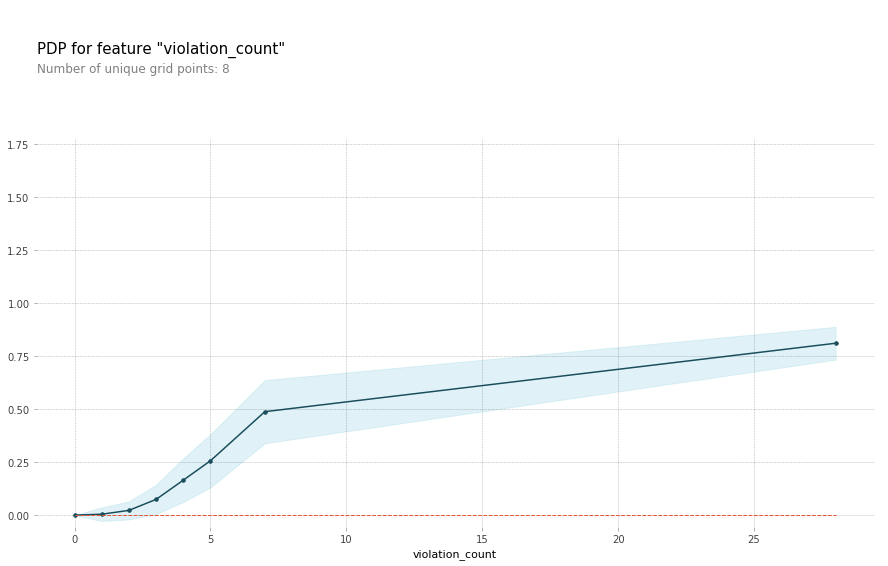

In [90]:
feature='violation_count'
pdp_isolated = pdp_isolate(model=pipe_2, dataset=X_train, model_features=X_train.columns, 
                           feature=feature)
pdp_plot(pdp_isolated, feature);

**As expected, higher violation count leads to higher likelihood of inspection failure**

In [94]:
encoder = ce.OrdinalEncoder()
X_train_transformed = encoder.fit_transform(X_train)

model = GradientBoostingClassifier()

model.fit(X_train_transformed, y_train)
permuter = PermutationImportance(model, scoring='roc_auc', n_iter=1, cv='prefit')
permuter.fit(X_train_transformed, y_train)

PermutationImportance(cv='prefit',
           estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
           n_iter=1, random_state=None, refit=True, scoring='roc_auc')

In [95]:
eli5.show_weights(permuter, top=None, feature_names=X_train_transformed.columns.tolist())

Weight,Feature
0.2626 ± 0.0000,violation_count
0.0655 ± 0.0000,Inspection Type
0.0152 ± 0.0000,inspection_year
0.0050 ± 0.0000,Facility Type
0.0036 ± 0.0000,Risk
0.0025 ± 0.0000,Longitude
0.0014 ± 0.0000,inspection_month
0.0011 ± 0.0000,Latitude
0.0009 ± 0.0000,Zip
0.0001 ± 0.0000,inspection_day


**Violation counts are very important as a predictive feature in the model**